In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
def brief_df (df):
  # Подсчитываем пустые значения и уникальные значение
  rows_na =df.isna().sum().reset_index().rename(columns={0: "valuesNa"})
  rows_notna = df.notna().sum().reset_index().rename(columns={0: "valuesNotNa"})
  rows_analysis = pd.merge(rows_na, rows_notna, on="index", how= "outer")
  rows_analysis["completeRatio"] = round((rows_analysis["valuesNotNa"]) / (rows_analysis["valuesNotNa"]+rows_analysis["valuesNa"])*100,2)

  cardinality = df.nunique().reset_index().rename(columns={0: "cardinality"})
  rows_analysis = pd.merge(rows_analysis, cardinality)

  # Размер датасета и кол-во дубликатов
  print("Размер:", df.shape)
  dup_raw = df.duplicated ().sum()
  dup_per = round((dup_raw*100)/df.shape[0],2)
  print ("Дубликаты:", dup_raw, "-&gt;", dup_per, "%")

  # Статистика по пустым значениям
  print("Проверка на отсутсвующие значениия")
  display(rows_analysis)

  # Первые пять строк
  print("Первые пять строк")
  display(df.head())

In [24]:
brief_df(df)

Размер: (891, 12)
Дубликаты: 0 -&gt; 0.0 %
Проверка на отсутсвующие значениия


,index,valuesNa,valuesNotNa,completeRatio,cardinality
0,PassengerId,0,891,100.00,891
1,Survived,0,891,100.00,2
2,Pclass,0,891,100.00,3
3,Name,0,891,100.00,891
4,Sex,0,891,100.00,2
5,Age,177,714,80.13,88
6,SibSp,0,891,100.00,7
7,Parch,0,891,100.00,7
8,Ticket,0,891,100.00,681
9,Fare,0,891,100.00,248


Первые пять строк


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000201DB0EBB00>, <matplotlib.lines.Line2D object at 0x00000201DB0EB260>, <matplotlib.lines.Line2D object at 0x00000201DB0EA420>, <matplotlib.lines.Line2D object at 0x00000201DB0EBE90>, <matplotlib.lines.Line2D object at 0x00000201DB0D0200>, <matplotlib.lines.Line2D object at 0x00000201DB0D3650>, <matplotlib.lines.Line2D object at 0x00000201DB0D1010>, <matplotlib.lines.Line2D object at 0x00000201DB0D3B60>, <matplotlib.lines.Line2D object at 0x00000201DB09F1A0>, <matplotlib.lines.Line2D object at 0x00000201DB09E330>, <matplotlib.lines.Line2D object at 0x00000201DB09ED80>, <matplotlib.lines.Line2D object at 0x00000201DB09CAD0>, <matplotlib.lines.Line2D object at 0x00000201DB09FE00>, <matplotlib.lines.Line2D object at 0x00000201DB09CD70>], 'caps': [<matplotlib.lines.Line2D object at 0x00000201DB0E8AD0>, <matplotlib.lines.Line2D object at 0x00000201DB0E8DD0>, <matplotlib.lines.Line2D object at 0x00000201DB0D35F0>, <m

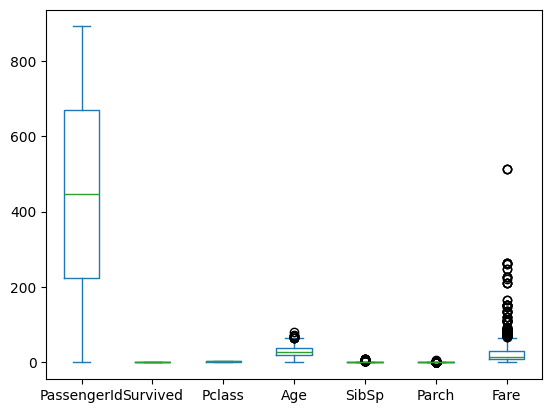

In [25]:
df.plot.box(return_type='both')

In [26]:
df["Age"].median()

28.0